*Exploratory Data Analysis on NYC Public School SAT Results using Python (pandas, matplotlib, numpy).*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath("../"))



from src.utils import load_raw, save_processed

#Load
df = load_raw("schools.csv")

#Check
df.columns.tolist()

['school_name',
 'borough',
 'building_code',
 'average_math',
 'average_reading',
 'average_writing',
 'percent_tested']

In [3]:
# Threshold: 80% of 800
THRESH = 0.8 * 800

# Filter schools with average_math >= THRESH
best_math_schools = (
    df.loc[df["average_math"] >= THRESH, ["school_name", "average_math"]]
      .sort_values("average_math", ascending=False)
      .reset_index(drop=True)
)

save_processed(best_math_schools, "best_math_schools.csv")
best_math_schools.head(10)


school_name  average_math
0                             Stuyvesant High School           754
1                       Bronx High School of Science           714
2                Staten Island Technical High School           711
3  Queens High School for the Sciences at York Co...           701
4  High School for Mathematics, Science, and Engi...           683
5                     Brooklyn Technical High School           682
6                        Townsend Harris High School           680
7  High School of American Studies at Lehman College           669
8  New Explorations into Science, Technology and ...           657
9                      Eleanor Roosevelt High School           641

In [5]:
# Add total SAT score
df["total_SAT"] = df["average_math"] + df["average_reading"] + df["average_writing"]

# Sort descending and take top 10
top_10_schools = (
    df.loc[:, ["school_name", "total_SAT"]]
      .sort_values("total_SAT", ascending=False)
      .head(10)
      .reset_index(drop=True)
)

save_processed(top_10_schools, "top_10_schools.csv")
top_10_schools

school_name  total_SAT
0                             Stuyvesant High School       2144
1                       Bronx High School of Science       2041
2                Staten Island Technical High School       2041
3  High School of American Studies at Lehman College       2013
4                        Townsend Harris High School       1981
5  Queens High School for the Sciences at York Co...       1947
6                     Bard High School Early College       1914
7                     Brooklyn Technical High School       1896
8                      Eleanor Roosevelt High School       1889
9  High School for Mathematics, Science, and Engi...       1889

In [6]:
# Aggregate SAT stats by borough
agg = (
    df.groupby("borough", as_index=False)
      .agg(num_schools=("school_name", "count"),
           average_SAT=("total_SAT", "mean"),
           std_SAT=("total_SAT", "std"))
)

# Round numeric values to 2 decimals
agg[["average_SAT", "std_SAT"]] = agg[["average_SAT", "std_SAT"]].round(2)

# Select borough with the largest std
largest_std_dev = agg.loc[[agg["std_SAT"].idxmax()]]
save_processed(agg, "sat_stats_by_borough.csv")
largest_std_dev

borough  num_schools  average_SAT  std_SAT
2  Manhattan           89      1340.13   230.29

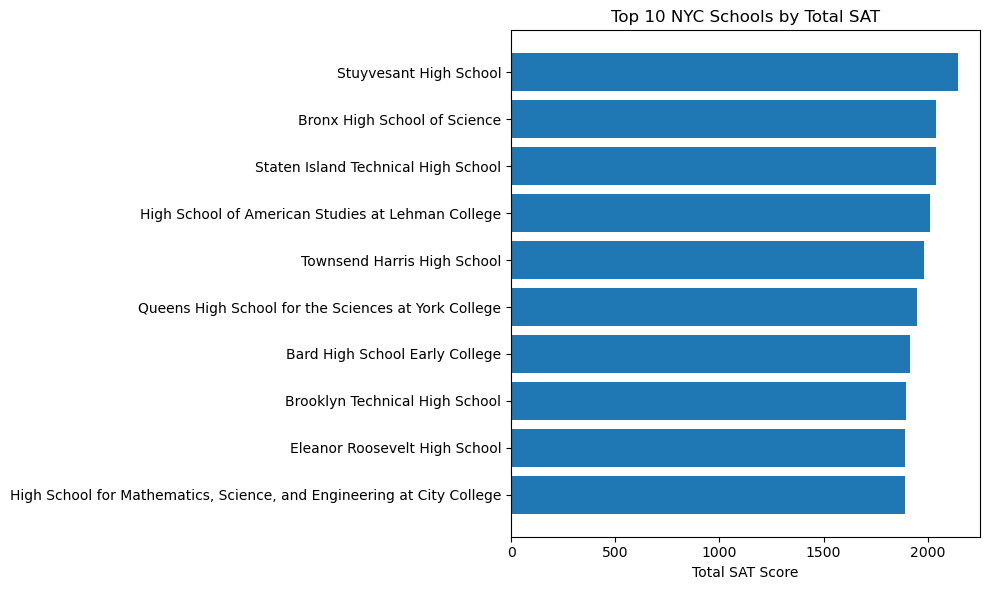

In [7]:
plt.figure(figsize=(10,6))
plt.barh(top_10_schools["school_name"][::-1], top_10_schools["total_SAT"][::-1])
plt.title("Top 10 NYC Schools by Total SAT")
plt.xlabel("Total SAT Score")
plt.tight_layout()
plt.savefig("../charts/top_10_schools.png", dpi=300, bbox_inches="tight")
plt.show()
